## Logistic regression with mnist dataset

example의 log_starter 실습

In [1]:
""" Starter code for simple logistic regression model for MNIST
with tf.data module
MNIST dataset: yann.lecun.com/exdb/mnist/
Created by Chip Huyen (chiphuyen@cs.stanford.edu)
CS20: "TensorFlow for Deep Learning Research"
cs20.stanford.edu
Lecture 03
"""
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import numpy as np
import tensorflow as tf
import time

import utils

C:\Users\home\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#define hyper-paramaters
learning_rate = 0.01
batch_size = 128
n_epochs = 30
n_train = 60000
n_test = 10000

In [3]:
#loading mnist dataset using keras
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [4]:
indices = np.random.permutation(y_train.shape[0])

## preprocess dataset

In [5]:
x_train = x_train / 255
x_train = x_train.reshape([-1,784]) #flatten
y_train = np.asarray(y_train, dtype=np.int32)

x_test = x_test / 255
x_test = x_test.reshape([-1, 784]) #flatten
y_test = np.asarray(y_test, dtype=np.int32)

## Show mnist data

In [6]:
import matplotlib.pyplot as plt

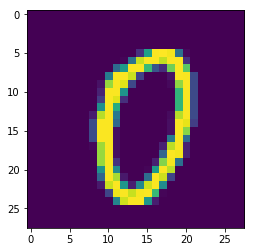

In [7]:
plt.imshow(x_train[1000].reshape([28,28]))

## Step 2: Create datasets and iterator

In [8]:
# create training Dataset and batch it
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.shuffle(10000)
train_data = train_data.batch(batch_size)
print(train_data)

test_data = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_data = test_data.batch(batch_size)
print(test_data)

<BatchDataset shapes: ((?, 784), (?,)), types: (tf.float64, tf.int32)>
<BatchDataset shapes: ((?, 784), (?,)), types: (tf.float64, tf.int32)>


In [9]:
# create one iterator and initialize it with different datasets
iterator = tf.data.Iterator.from_structure(train_data.output_types,
                                          train_data.output_shapes)
img, label = iterator.get_next()

train_init = iterator.make_initializer(train_data)
test_init = iterator.make_initializer(test_data)

In [10]:
img = tf.cast(img ,dtype=tf.float32)
label = tf.cast(label, dtype=tf.int32)

## Step 3: create weights and bias

* w is initialized to random variables with mean of 0, stddev of 0.01 
* b is initialized to 0
* shape of w depends on the dimension of X and Y so that Y = tf.matmul(X, w)
* shape of b depends on Y


In [11]:
w = tf.get_variable(name='weigth', shape=(784, 10), initializer=tf.random_normal_initializer(0, 0.01))
b = tf.get_variable(name='bias', shape=(1, 10), initializer=tf.zeros_initializer())

## Step 4: build model
* the model that returns the logits.
* this logits will be later passed through softmax layer

In [12]:
logit = tf.matmul(img, w) + b

## Step 5: define loss function
* use cross entropy of softmax of logits as the loss function

In [13]:
#Original
#entropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=logit, labels=label, name='entropy')
#loss = tf.reduce_mean(entropy, name='loss')

#Other
y_one_hot = tf.one_hot(label, depth=10)
cross_entropy = tf.losses.softmax_cross_entropy(onehot_labels=y_one_hot, logits=logit)

## Step 6: define training op
* using gradient descent with learning rate of 0.01 to minimize loss

In [14]:
optimizer = tf.train.AdadeltaOptimizer(learning_rate=0.01).minimize(cross_entropy)

## Step 7: calculate accuracy with test set

In [16]:
preds = tf.nn.softmax(logit)
correct_preds = tf.equal(tf.argmax(preds, 1), tf.cast(label, tf.int64))
accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32))

In [17]:
#writer
writer = tf.summary.FileWriter(logdir='./graphs/log_str/', graph=tf.get_default_graph())

In [19]:
with tf.Session() as sess:
    
    start_time = time.time()
    sess.run(tf.global_variables_initializer())
    
    # train the model n_epochs times
    for i in range(n_epochs):
        sess.run(train_init)
        total_loss = 0
        n_batches = 0
        
        try:
            while True:
                _, l = sess.run([optimizer, cross_entropy])
                total_loss += l
                n_batches += 1
        except tf.errors.OutOfRangeError:
            pass
        print('Average loss epoch {0}: {1}'.format(i, total_loss/n_batches))
    print('Total time: {0} seconds'.format(time.time() - start_time))
    
    # test the model
    sess.run(test_init)
    total_correct_preds = 0
    try:
        while True:
            accuracy_batch = sess.run(accuracy)
            total_correct_preds += accuracy_batch
    except tf.errors.OutOfRangeError:
        pass
        
    print('Accuracy {0}'.format(total_correct_preds/n_test))

writer.close()

Average loss epoch 0: 2.2556700370967517
Average loss epoch 1: 2.1656486535631516
Average loss epoch 2: 2.0751462783386456
Average loss epoch 3: 1.9861966335951393
Average loss epoch 4: 1.9002810304861333
Average loss epoch 5: 1.8178170314475672
Average loss epoch 6: 1.7389544647639747
Average loss epoch 7: 1.6644297184974655
Average loss epoch 8: 1.5942724762694922
Average loss epoch 9: 1.5283081968710113
Average loss epoch 10: 1.4663861562956626
Average loss epoch 11: 1.4087777043710639
Average loss epoch 12: 1.3550552638100664
Average loss epoch 13: 1.3048659003873877
Average loss epoch 14: 1.258231823632458
Average loss epoch 15: 1.2148125082699222
Average loss epoch 16: 1.174424140946443
Average loss epoch 17: 1.136829639548686
Average loss epoch 18: 1.102000654887543
Average loss epoch 19: 1.069671294455335
Average loss epoch 20: 1.039398170356303
Average loss epoch 21: 1.0111564228783791
Average loss epoch 22: 0.9848467726697291
Average loss epoch 23: 0.9602668770849069
Average 